In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
td = pd.read_csv("Tinder.csv")
td.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        453 non-null    int64  
 1   Segment Type              453 non-null    object 
 2   Segment Description       453 non-null    object 
 3   Answer                    453 non-null    object 
 4   Count                     453 non-null    int64  
 5   Percentage                453 non-null    float64
 6   It became a Relationship  453 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


In [4]:
td.describe()

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


In [5]:
td['Segment Description'].nunique()

151

In [6]:
td['Segment Type'].value_counts()

University    441
Gender          6
Web             3
Mobile          3
Name: Segment Type, dtype: int64

In [7]:
td[td['Segment Type']=='Gender']

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
6,292893,Gender,Male respondents,Yes,472,0.213,Yes
7,292895,Gender,Male respondents,No,1172,0.528,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
9,292899,Gender,Female respondents,Yes,325,0.198,No
10,292901,Gender,Female respondents,No,797,0.487,Yes
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No


In [8]:
td[td['Answer']=="I don't use Tinder"]

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
5,292891,Web,Web-based respondents,I don't use Tinder,0,0.000,No
8,292897,Gender,Male respondents,I don't use Tinder,574,0.259,No
11,292903,Gender,Female respondents,I don't use Tinder,516,0.315,No
14,292909,University,Chapman University,I don't use Tinder,19,0.302,Yes
...,...,...,...,...,...,...,...
440,293761,University,Penn State University,I don't use Tinder,1,0.100,Yes
443,293767,University,Minnesota State University Mankato,I don't use Tinder,0,0.000,No
446,293773,University,University of Florida,I don't use Tinder,0,0.000,No
449,293779,University,Boston College,I don't use Tinder,1,0.200,No


In [9]:
td['Answer'].value_counts()

I don't use Tinder    151
Yes                   151
No                    151
Name: Answer, dtype: int64

In [10]:
td['Relation'] = td['It became a Relationship']
del td['It became a Relationship']


In [11]:
td.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,Relation
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [12]:
simplifed  = {"Relation" : {"Yes":1 , "No": 0},
              "Answer" : {"Yes":1,"No":2,"I don't use Tinder":3},
              "Segment Type": {"University":1,"Gender":2,"Web":3,"Mobile":4}}

In [13]:
td =td.replace(simplifed)
td.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,Relation
0,292881,4,Mobile respondents,1,797,0.207,1
1,292883,4,Mobile respondents,2,1969,0.511,0
2,292885,4,Mobile respondents,3,1090,0.283,1
3,292887,3,Web-based respondents,1,0,0.000,0
4,292889,3,Web-based respondents,2,0,0.000,0


In [14]:
del td['ID']

In [15]:
td.head()

,Segment Type,Segment Description,Answer,Count,Percentage,Relation
0,4,Mobile respondents,1,797,0.207,1
1,4,Mobile respondents,2,1969,0.511,0
2,4,Mobile respondents,3,1090,0.283,1
3,3,Web-based respondents,1,0,0.000,0
4,3,Web-based respondents,2,0,0.000,0


###EDA

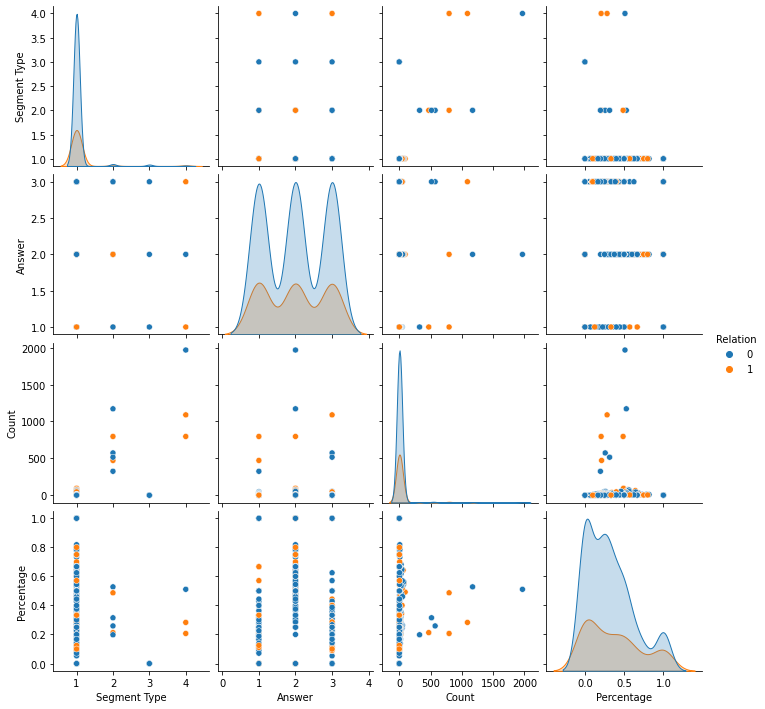

In [16]:
sns.pairplot(data=td,hue='Relation')

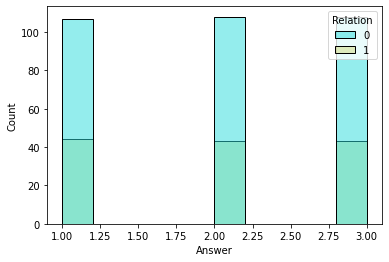

In [17]:
sns.histplot(x='Answer',data=td,hue='Relation',palette='rainbow')

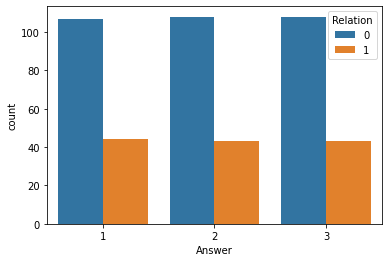

In [18]:
sns.countplot(x='Answer',hue='Relation',data=td)

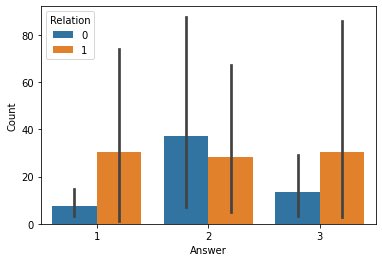

In [19]:
sns.barplot(x='Answer',y='Count',data=td,hue='Relation')

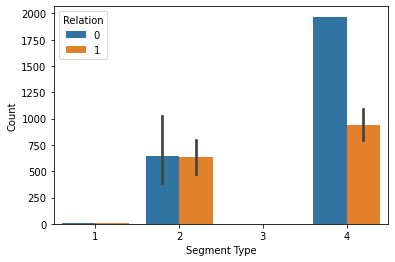

In [20]:
sns.barplot(x='Segment Type',y='Count',data=td,hue='Relation')

In [21]:
td.columns

Index(['Segment Type', 'Segment Description', 'Answer', 'Count', 'Percentage',
       'Relation'],
      dtype='object')

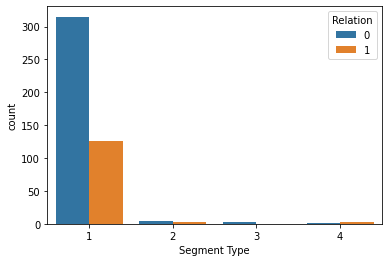

In [22]:
sns.countplot(x='Segment Type',data=td,hue='Relation')


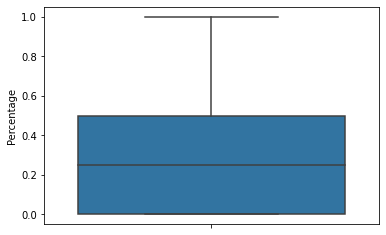

In [23]:
sns.boxplot(y='Percentage',data=td)

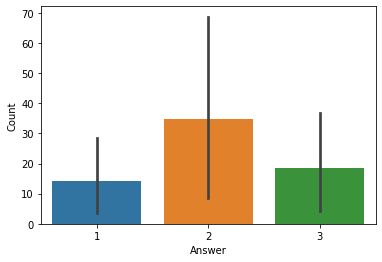

In [24]:
sns.barplot(x='Answer',y='Count',data=td)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c3869c410>,
      dtype=object)

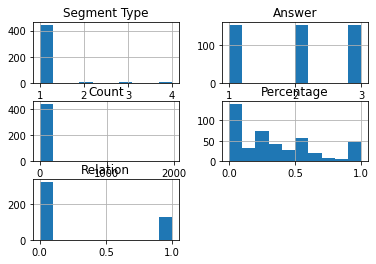

In [25]:
td.hist()

Algorithm 


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [124]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
td['Segment Description']= label_encoder.fit_transform(td['Segment Description'])

In [125]:
td.head()

,Segment Type,Segment Description,Answer,Count,Percentage,Relation
0,4,54,1,797,0.207,1
1,4,54,2,1969,0.511,0
2,4,54,3,1090,0.283,1
3,3,145,1,0,0.000,0
4,3,145,2,0,0.000,0


In [484]:
X = td[['Segment Description','Answer']]

In [485]:
y = td['Relation']

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [487]:
svc_model = SVC()

In [488]:
svc_model.fit(X_train,y_train)


SVC()

In [489]:
predictions = svc_model.predict(X_test)


In [490]:
from sklearn.metrics import classification_report,confusion_matrix

In [491]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       100
           1       0.00      0.00      0.00        36

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.42       136
weighted avg       0.54      0.74      0.62       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [492]:
from sklearn.model_selection import GridSearchCV

In [493]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [494]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [495]:
grid_predictions = grid.predict(X_test)

In [496]:
print(classification_report(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       100
           1       0.00      0.00      0.00        36

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.42       136
weighted avg       0.54      0.74      0.62       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [497]:
logmod = LogisticRegression()

In [498]:
logmod.fit(X_train,y_train)

LogisticRegression()

In [499]:
pred = logmod.predict(X_test)

In [500]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       100
           1       0.00      0.00      0.00        36

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.42       136
weighted avg       0.54      0.74      0.62       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [501]:
nb = MultinomialNB()

In [502]:
nb.fit(X_train,y_train)

MultinomialNB()

In [503]:
predictions = nb.predict(X_test)


In [504]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[100   0]
 [ 36   0]]


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       100
           1       0.00      0.00      0.00        36

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.42       136
weighted avg       0.54      0.74      0.62       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [505]:
from sklearn.tree import DecisionTreeClassifier

In [506]:
dtree = DecisionTreeClassifier()


In [507]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [508]:
predictions = dtree.predict(X_test)

In [509]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       100
           1       0.17      0.19      0.18        36

    accuracy                           0.54       136
   macro avg       0.43      0.43      0.43       136
weighted avg       0.56      0.54      0.55       136



In [510]:
from sklearn.ensemble import RandomForestClassifier

In [511]:
rfc = RandomForestClassifier(n_estimators=600)

In [512]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [513]:
predictions = rfc.predict(X_test)

In [514]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       100
           1       0.20      0.25      0.23        36

    accuracy                           0.54       136
   macro avg       0.46      0.45      0.45       136
weighted avg       0.57      0.54      0.56       136

